# Final Project $\cdot$ Julian Nowaczek

Setup environment:

In [1]:
import imageio
import numpy as np
import math
from matplotlib.colors import LogNorm
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
import scipy.misc as misc
import scipy.ndimage as ndi
from skimage import io, color, exposure, filters, img_as_float, img_as_ubyte, measure, morphology

In [2]:
plt.style.use(['seaborn-poster', {'axes.grid': False, 'image.cmap' : 'Greys_r'}])

original = misc.ascent()

## Question 1

## Question 2

## Question 3

## Question 4

### A.

In [3]:
smoothing = [[1,  4,  6,  4,  1], 
             [4,  16, 24, 16, 4], 
             [6,  24, 36, 25, 6], 
             [4,  16, 24, 16, 4], 
             [1,  4,  6,  4,  1]]

## Question 5

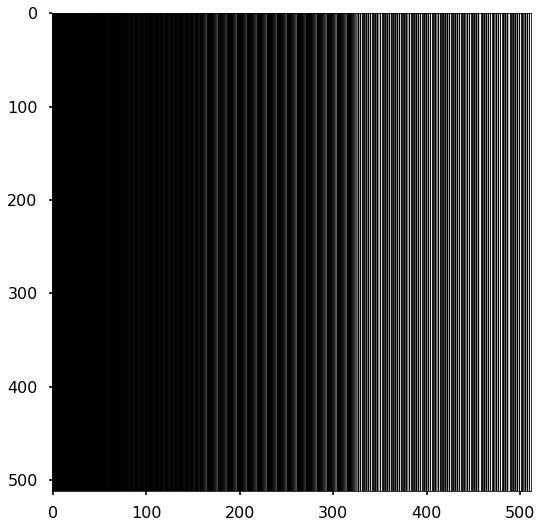

4.7593377463690065e-25


In [4]:
image = np.zeros((512, 512))

for x in range(512):
    for y in range(512):
        image[y,x] = (math.sin(4 * math.pi * x) ** 2) * (math.cos(8 * math.pi * y) ** 2)
plt.imshow(image)
plt.show()
print(np.max(image))

TypeError: Image data cannot be converted to float

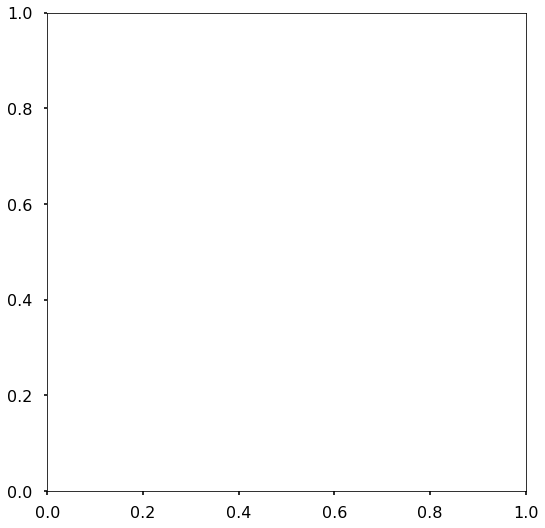

In [5]:
fourier = np.fft.fftshift(np.fft.fft2(image))
plt.imshow(fourier)
plt.show()

## Question 6

The human eye contains a series of lenses that focus light onto specialized cells towards the back of the eye. These cells are split into two different types: rods and cones. Rod cells are incapable of color vision but are much more sensitive to light than cone cells, making them responsible for night vision. Cone cells have three subtypes that are sensitive to either red, green, or blue light and this variation allows for the experience of color.

## Question 7

Systems for the display of color may be split into two distinct halves, additive color and subtractive color. In an additive color system light is emitted as a combination of three primary colors – red, green, and blue. This contrasts with a subtractive color system like that used in printing where the ink deposited on paper controls which wavelengths of light are reflected or absorbed by the printed material. The primary colors for a subtractive color system will be cyan, magenta, and yellow where each pigment controls how much of its corresponding additive color is removed from white light hitting a surface. The HSV color model is an alternative to the RGB color model and colors can be easily converted from one to the other. The main advantage of the HSV color model is its geometric representation better aligns with human perception than the RGB model.

## Question 8

## Question 9

## Question 10

## Question 11

## Question 12

## Question 13

## Question 14

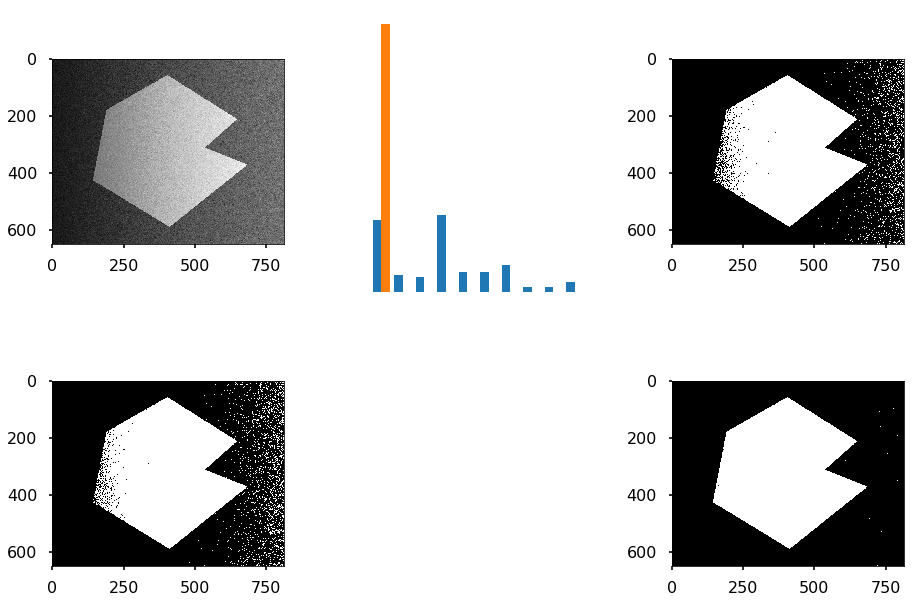

In [41]:
given_image = imageio.imread('./Final project images/Fig1046(a)(septagon_noisy_shaded).tif')

plt.subplot(2, 3, 1)
plt.imshow(given_image)
plt.subplot(2, 3, 2)
plt.hist(exposure.histogram(given_image))
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(given_image > 50)
plt.subplot(2, 3, 4)
plt.imshow(given_image > filters.threshold_otsu(given_image))
plt.subplot(2, 3, 6)
local_otsu = filters.rank.otsu(given_image, morphology.square(512))
plt.imshow(given_image > local_otsu)
plt.tight_layout()
plt.show()

I know that my local Otsu method is not the same as dividing the image into sixths, but it works about as well. I think the errors are more visible in my image since its a binary image vs. the book which does not appear to be.

## Question 15

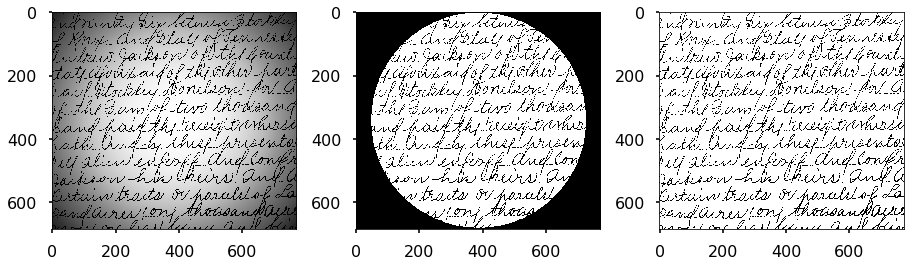

In [49]:
given_image = imageio.imread('./Final project images/Fig1049(a)(spot_shaded_text_image).tif')

plt.subplot(1, 3, 1)
plt.imshow(given_image)
plt.subplot(1, 3, 2)
plt.imshow(given_image > filters.threshold_otsu(given_image))
plt.subplot(1, 3, 3)
plt.imshow(given_image > filters.threshold_local(given_image, 21, .5))
plt.tight_layout()
plt.show()

## Question 16

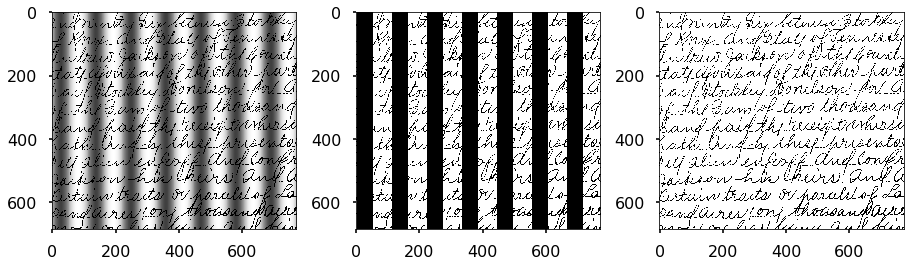

In [50]:
given_image = imageio.imread('./Final project images/Fig1050(a)(sine_shaded_text_image).tif')

plt.subplot(1, 3, 1)
plt.imshow(given_image)
plt.subplot(1, 3, 2)
plt.imshow(given_image > filters.threshold_otsu(given_image))
plt.subplot(1, 3, 3)
plt.imshow(given_image > filters.threshold_local(given_image, 21, .5))
plt.tight_layout()
plt.show()

## Question 17

## Question 18

## Question 19

In [ ]:
e1 = [[-2, -1,  0], 
      [-1,  1,  1], 
      [ 0,  1,  2]]
e2 = [[ 0, -1, -2], 
      [ 1,  1, -1], 
      [ 2,  1,  0]]
e3 = [[-2, -1,  0], 
      [-1,  0,  1], 
      [ 0,  1,  2]]
e4 = [[-1,  0,  0], 
      [ 0,  0,  0], 
      [ 0,  0,  1]]

masks = [e1, e2, e3, e4]

for i in range(len(masks)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(ndi.filters.convolve(original, masks[i]))
plt.tight_layout()
plt.show()

## Question 20

In [ ]:
e1_5 = [[-4, -3, -2, -1,  0], 
        [-3,  0, -1,  0,  1], 
        [-2, -1,  1,  1,  2],
        [-1,  0,  1,  0,  3],
        [ 0,  1,  2,  3,  4]]
e2_5 = [[ 0, -1, -2, -3, -4], 
        [ 1,  0, -1, -2, -3], 
        [ 2,  1,  1, -1, -2],
        [ 3,  2,  1,  0, -1],
        [ 4,  3,  2,  1,  0]]
e3_5 = [[-4, -3, -2, -1,  0], 
        [-3,  0,  1,  0,  1], 
        [-2,  0,  1,  0,  2],
        [-1,  0,  1,  0,  3],
        [ 0,  1,  2,  3,  4]]
e4_5 = [[-1,  0,  0,  0,  0], 
        [ 0, -1,  0,  0,  0], 
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  1]]

masks_5 = [e1_5, e2_5, e3_5, e4_5]
for i in range(len(masks_5)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(ndi.filters.convolve(original, masks_5[i]))
plt.tight_layout()
plt.show()

To be perfectly honest I'm not sure how to do this, aside from the fourth one (because it's in the [Wikipedia article](https://en.wikipedia.org/wiki/Image_embossing#Technical_details)). I can tell the 3x3 masks from the 5x5 ones by the sharpness of the result, but I couldn't describe any other differences.

## Question 21

In [ ]:
rx = [[ 1,  0],
      [ 0, -1]]
ry = [[ 0,  1], 
      [-1,  0]]
px = [[ 1,  0, -1], 
      [ 1,  0, -1], 
      [ 1,  0, -1]]
py = [[ 1,  1,  1], 
      [ 0,  0,  0], 
      [-1, -1, -1]]
sx = [[ 1,  0, -1], 
      [ 2,  0, -2], 
      [ 1,  0, -1]]
sy = [[ 1,  2,  1], 
      [ 0,  0,  0], 
      [-1, -2, -1]]

### A.

In [ ]:
print(ndi.filters.convolve(rx, px))

In [ ]:
print(ndi.filters.convolve(rx, sx))

In [ ]:
print(ndi.filters.convolve(px, sx))

In [ ]:
print(ndi.filters.convolve(rx, rx))
plt.imshow(ndi.filters.convolve(original, ndi.filters.convolve(rx, rx)))
plt.show()

In [ ]:
print(ndi.filters.convolve(px, px))

In [ ]:
print(ndi.filters.convolve(sx, sx))

### B.

In [ ]:
print(ndi.filters.convolve(ry, py))

In [ ]:
print(ndi.filters.convolve(ry, sy))

In [ ]:
print(ndi.filters.convolve(py, sy))

In [ ]:
print(ndi.filters.convolve(ry, ry))

In [ ]:
print(ndi.filters.convolve(py, py))

In [ ]:
print(ndi.filters.convolve(sy, sy))

### C.

In [ ]:
print(ndi.filters.convolve(sx, sy))

In [ ]:
print(ndi.filters.convolve(px, py))

### D.

### E.

In [ ]:
print(ndi.filters.convolve(sx, sx) + ndi.filters.convolve(sy, sy))

I _think_ this produces the sum of the second partial derivatives?

## Question 22

In [ ]:
given_image = np.array([[21, 21, 21, 95, 169, 243, 243, 243], 
                        [21, 21, 21, 95, 169, 243, 243, 243], 
                        [21, 21, 21, 95, 169, 243, 243, 243], 
                        [21, 21, 21, 95, 169, 243, 243, 243]])
frequencies = [(3 / 8, '21'), (1 / 8, '95'), (1 / 8, '169'), (3 / 8, '243')]

### A.

In [ ]:
measure.shannon_entropy(given_image)

### B.

In [ ]:
# REF: https://stackoverflow.com/questions/11587044/how-can-i-create-a-tree-for-huffman-encoding-and-decoding
import queue

class HuffmanNode(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right
    def children(self):
        return((self.left, self.right))

def create_tree(frequencies):
    p = queue.PriorityQueue()
    for value in frequencies:    # 1. Create a leaf node for each symbol
        p.put(value)             #    and add it to the priority queue
    while p.qsize() > 1:         # 2. While there is more than one node
        l, r = p.get(), p.get()  # 2a. remove two highest nodes
        node = HuffmanNode(l, r) # 2b. create internal node with children
        p.put((l[0]+r[0], node)) # 2c. add new node to queue      
    return p.get()               # 3. tree is complete - return root node
    
node = create_tree(frequencies)

# Recursively walk the tree down to the leaves,
#   assigning a code value to each symbol
def walk_tree(node, prefix="", code={}):
    if isinstance(node[1].left[1], HuffmanNode):
        walk_tree(node[1].left,prefix+"0", code)
    else:
        code[node[1].left[1]]=prefix+"0"
    if isinstance(node[1].right[1],HuffmanNode):
        walk_tree(node[1].right,prefix+"1", code)
    else:
        code[node[1].right[1]]=prefix+"1"
    return(code)

code = walk_tree(node)
for i in sorted(frequencies, reverse=True):
    print(i[1], '{:6.2f}'.format(i[0]), code[i[1]])

### C.

### D.

### E.

### F.

In [ ]:
print(ndi.filters.convolve(rx, rx))
print(np.multiply(rx, rx))
plt.imshow(ndi.filters.convolve(ndi.filters.convolve(original, rx), rx))
plt.show()
plt.imshow(ndi.filters.convolve(original, np.multiply(rx, rx)))
plt.show()
plt.imshow(ndi.filters.convolve(original, ndi.filters.convolve(rx, rx)))
plt.show()